In [6]:
!pip install xlrd
!pip install pandas
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# ● Imports


In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# ● Load a data frame from a csv file.


In [8]:

file="datasets/precios-de-gas-natural-.csv"
df_energy_price=pd.read_csv(file)


# ● Display csv dataframe.

In [9]:
df_energy_price

,id_pub,anio,mes,cuenca,contrato,precio_distribuidora,precio_gnc,precio_usina,precio_industria,precio_otros,precio_ppp,precio_expo,indice_tiempo
0,1,2019,1,Austral Santa Cruz,FIRME,3.56,3.43,3.10,3.27,3.75,3.30,2.00,2019-01
1,2,2019,1,Austral Santa Cruz,INTERRUMPIBLE,3.04,3.54,2.29,2.38,0.00,2.39,3.25,2019-01
2,3,2019,1,Austral Santa Cruz,TOTAL,3.40,3.44,2.65,3.13,3.75,3.03,3.08,2019-01
3,4,2019,1,Austral Tierra del Fuego,FIRME,3.66,3.33,3.30,3.39,0.00,3.45,0.00,2019-01
4,5,2019,1,Austral Tierra del Fuego,INTERRUMPIBLE,3.43,0.00,2.33,2.28,0.00,2.37,3.49,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,770,2022,8,Noroeste,INTERRUMPIBLE,0.00,3.91,4.23,5.17,0.00,4.39,0.00,2022-08
770,771,2022,8,Noroeste,TOTAL,0.00,4.28,4.23,6.00,0.00,5.47,0.00,2022-08
771,772,2022,8,Total Cuenca,FIRME,2.73,3.76,3.99,4.81,0.00,3.60,7.61,2022-08
772,773,2022,8,Total Cuenca,INTERRUMPIBLE,0.00,3.46,4.04,4.39,4.29,4.22,7.67,2022-08


# ●  Load a different data frame from an Excel file.


In [10]:
file = 'datasets/parques-industriales-renpi.xlsx'
df_parks= pd.read_excel(file)

# ● Display excel dataframe.

In [11]:
df_parks

,parque_industrial,provincia_nombre,provincia_id,localidad_nombre,localidad_id,contacto_email,Unnamed: 6
0,SECTOR INDUSTRIAL PLANIFICADO 25 DE MAYO,Buenos Aires,6,25 De Mayo,6854100000,produccion25demayo@hotmail.com,NaN
1,SECTOR INDUSTRIAL PLANIFICADO MUNICIPAL DE CARHUÉ,Buenos Aires,6,Adolfo Alsina,6007010000,lageyre.manu@gmail.com; produccion@adolfoalsin...,NaN
2,SIP DE ADOLFO GONZALES CHAVES,Buenos Aires,6,Adolfo Gonzales Chaves,6014010000,ofiproduccion2016@gmail.com,NaN
3,SECTOR INDUSTRIAL PLANIFICADO Nº 1 ALBERTI,Buenos Aires,6,Alberti,6021010000,produccionalberti@gmail.com,NaN
4,SECTOR INDUSTRIAL PLANIFICADO N° 2 ALBERTI,Buenos Aires,6,Alberti,6021010000,produccionalberti@gmail.com,NaN
...,...,...,...,...,...,...,...
318,PARQUE INDUSTRIAL FAMAILLA,Tucumán,90,Famailla,90028030002,parqueindustrial@famailla.gob.ar; alfredodpere...,NaN
319,PORTAL DEL NOA,Tucumán,90,Lules,90063050000,palbarracin@aginmobiliaria.com.ar,NaN
320,SAN ISIDRO DE LULES,Tucumán,90,Lules,90063050000,info@casciagases.com.ar,NaN
321,PARQUE INDUSTRIAL KANAMICO,Tucumán,90,Lules,90063050000,fedesaab@gmail.com ; pikanamico@gmail.com,NaN


#● Apply the following actions on the second dataframe: Group By on a field and using sum() Perform a Melt, final dataframe get the number of industrial parks per province.



In [12]:
df_parks= df_parks.drop(['provincia_id','localidad_nombre','localidad_id','contacto_email','Unnamed: 6'],axis=1)
df_count=df_parks.groupby('provincia_nombre')['parque_industrial'].value_counts().reset_index(name='counts')
df_count=df_count.groupby(['provincia_nombre'])['counts'].sum()
df_sum_park= df_count.sort_values(ascending=False).reset_index(name ='cant_parques_industriales')
df_sum_park

,provincia_nombre,cant_parques
0,Buenos Aires,117
1,Santa Fe,34
2,Córdoba,30
3,Entre Ríos,29
4,Río Negro,16
5,Misiones,12
6,La Pampa,11
7,Chubut,11
8,Neuquén,11
9,Mendoza,10


# - The dataframe apply melt, subset columns to the right of "Provincia_nombre" and turn them into rows "parque_industrial".



In [13]:
df_prov_name = pd.melt(df_parks, id_vars='provincia_nombre', value_vars=['parque_industrial'])
df_prov_name

,provincia_nombre,variable,value
0,Buenos Aires,parque_industrial,SECTOR INDUSTRIAL PLANIFICADO 25 DE MAYO
1,Buenos Aires,parque_industrial,SECTOR INDUSTRIAL PLANIFICADO MUNICIPAL DE CARHUÉ
2,Buenos Aires,parque_industrial,SIP DE ADOLFO GONZALES CHAVES
3,Buenos Aires,parque_industrial,SECTOR INDUSTRIAL PLANIFICADO Nº 1 ALBERTI
4,Buenos Aires,parque_industrial,SECTOR INDUSTRIAL PLANIFICADO N° 2 ALBERTI
...,...,...,...
318,Tucumán,parque_industrial,PARQUE INDUSTRIAL FAMAILLA
319,Tucumán,parque_industrial,PORTAL DEL NOA
320,Tucumán,parque_industrial,SAN ISIDRO DE LULES
321,Tucumán,parque_industrial,PARQUE INDUSTRIAL KANAMICO


# ● Create a bar chart with the first dataframe. Gnc avg price per year.



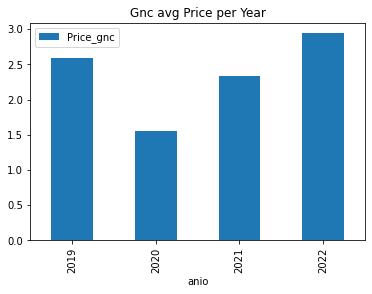

In [14]:
df_energy_price= df_energy_price.drop(['id_pub','mes','cuenca','contrato','precio_distribuidora','precio_usina','precio_industria','precio_otros','precio_ppp','precio_expo','indice_tiempo'],axis=1)
df_energy_price=df_energy_price.groupby(['anio'])['precio_gnc'].mean().reset_index(name='Price_gnc')

df = pd.DataFrame(df_energy_price,columns=['anio','Price_gnc'])
df.plot(x ='anio', y='Price_gnc', kind = 'bar')
plt.title('Gnc avg Price per Year')
plt.show()


# ● Extra: Bitcoin Marketcap avg Chart per year.


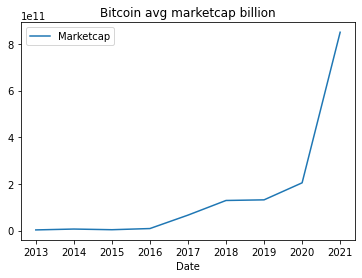

In [15]:

df_btc_market=pd.read_csv('datasets/coin_Bitcoin.csv')
df_btc_market.reset_index(inplace = True,drop = True)
df_btc_market['Date'] = pd.to_datetime(df_btc_market['Date']).dt.normalize()
df_btc_market['Date'] = df_btc_market['Date'].dt.strftime('%Y')

df_btc_market=df_btc_market.groupby(['Date'])['Marketcap'].mean().reset_index(name='Marketcap')

df = pd.DataFrame(df_btc_market,columns=['Date','Marketcap'])
df.plot(x ='Date', y='Marketcap', kind = 'line')
plt.title('Bitcoin avg marketcap billion')
plt.show()